# Clustering

This is a cluster model of the top ten features Ames, Iowa dataset gathered from a linear regression. K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning and will be used to form the model.

### Data Preparation

In [1]:
library(caret)
library(reshape2)
library(ggplot2)
library(dplyr)
library(cluster) 
library(repr)
set.seed(100)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Load Data - Refer to 01. EDA for more details
source('./src/load_data.r')
dummy <- dummyVars(" ~ .", data = ames)
ames <- data.frame(predict(dummy, newdata = ames))

Once again, we split our data into training and testing sets and are looking at the top ten variables. Because we are also looking at a clustering model, it is important to scale the data.

In [3]:
in_train <- createDataPartition(y = ames$SalePrice, p = 0.6, list = FALSE)
train <- ames[in_train,]
test <- ames[-in_train,]
train <- as.data.frame(scale(train))

top10 <- c('Bedroom.AbvGr.3','Bedroom.AbvGr.2','TotRms.AbvGrd.6','TotRms.AbvGrd.7','TotRms.AbvGrd.5','Bedroom.AbvGr.4',
           'TotRms.AbvGrd.8','TotRms.AbvGrd.4','Bedroom.AbvGr.1','TotRms.AbvGrd.9', 'SalePrice')
train_top10 <- train[top10]
head(train_top10)

,Bedroom.AbvGr.3,Bedroom.AbvGr.2,TotRms.AbvGrd.6,TotRms.AbvGrd.7,TotRms.AbvGrd.5,Bedroom.AbvGr.4,TotRms.AbvGrd.8,TotRms.AbvGrd.4,Bedroom.AbvGr.1,TotRms.AbvGrd.9,SalePrice
2,-1.0990247,1.6892717,-0.6337864,-0.5487139,1.9804387,-0.3820215,-0.3561613,-0.2836732,-0.2095662,-0.2139626,-0.9431265
3,0.9093801,-0.5916343,1.5769210,-0.5487139,-0.5046514,-0.3820215,-0.3561613,-0.2836732,-0.2095662,-0.2139626,-0.1037031
4,0.9093801,-0.5916343,-0.6337864,-0.5487139,-0.5046514,-0.3820215,2.8061194,-0.2836732,-0.2095662,-0.2139626,0.7983637
5,0.9093801,-0.5916343,1.5769210,-0.5487139,-0.5046514,-0.3820215,-0.3561613,-0.2836732,-0.2095662,-0.2139626,0.1205607
7,-1.0990247,1.6892717,1.5769210,-0.5487139,-0.5046514,-0.3820215,-0.3561613,-0.2836732,-0.2095662,-0.2139626,0.4162382
8,-1.0990247,1.6892717,-0.6337864,-0.5487139,1.9804387,-0.3820215,-0.3561613,-0.2836732,-0.2095662,-0.2139626,0.1406066


### Determining Clusters

First, we must determine how many clusters are needed.

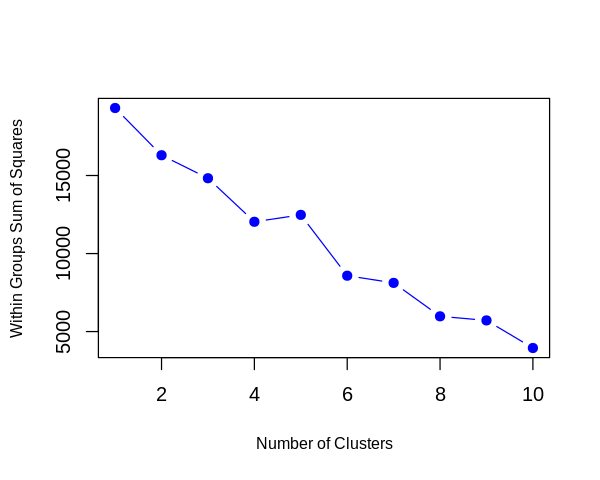

In [4]:
# Compute total within-cluster sum of square
wss <- (nrow(train_top10)-1) * sum(apply(train_top10,2,var))  

# Compute wss for for 2-10 clusters
for (i in 2:10) 
    wss[i] <- sum(kmeans(train_top10, centers=i)$withinss)

options(repr.plot.width=5, repr.plot.height=4)
plot(1:10, wss, type="b", col = "blue", pch = 19, xlab="Number of Clusters", ylab="Within Groups Sum of Squares", cex.lab = .8)

From the graph, it seems like 4 is the optimal number of clusters. 

### K-Means Cluster Analysis

Now, we fit the k-means cluster analysis.

In [5]:
# K-Means Cluster Analysis - 4 Cluster Solutions
fit <- kmeans(train_top10, 4)
aggregate(train_top10, by=list(fit$cluster), FUN=mean) #cluster means
k_means_cluster <- data.frame(train_top10, fit$cluster)

Group.1,Bedroom.AbvGr.3,Bedroom.AbvGr.2,TotRms.AbvGrd.6,TotRms.AbvGrd.7,TotRms.AbvGrd.5,Bedroom.AbvGr.4,TotRms.AbvGrd.8,TotRms.AbvGrd.4,Bedroom.AbvGr.1,TotRms.AbvGrd.9,SalePrice
1,0.8269094,-0.5916343,0.35942996,0.35296238,-0.5046514,-0.3820215,0.06776763,-0.2790756,-0.2095662,-0.2139626,0.0600273
2,-0.8888428,-0.5739529,-0.54810011,-0.03426915,-0.4950193,2.2210551,0.57536325,-0.2836732,-0.1902693,1.2439688,0.5661976
3,-1.0990247,1.6792678,-0.07141349,-0.37199440,0.5907502,-0.3820215,-0.30068270,0.4927241,-0.2095662,-0.2139626,-0.2268375
4,0.2120173,-0.5916343,-0.57237790,-0.52676836,1.2786308,-0.3820215,-0.31224075,0.3684263,1.4730208,-0.2139626,-0.4275170


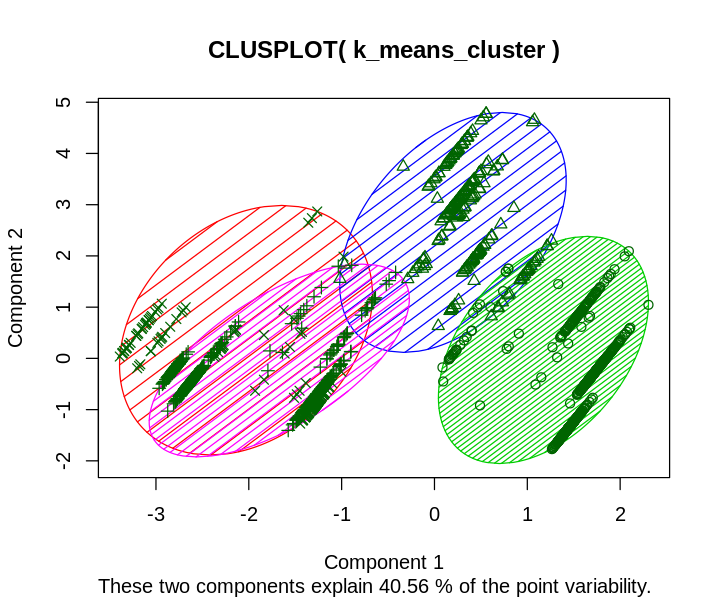

In [10]:
# Cluster Plots
options(repr.plot.width=6, repr.plot.height=5)
clusplot(k_means_cluster, fit$cluster, color=TRUE, shade=TRUE, labels = 1, lines=0)

# Another way to plot it
#install.packages('fpc')
#library(fpc)
#plotcluster(k_means_cluster, fit$cluster)